In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/Intern bp

/content/gdrive/MyDrive/Intern bp


In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
import pandas as pd 
x = pd.read_csv('processed_x.csv')
y = pd.read_csv('processed_y.csv')
y_unscaled = pd.read_csv('bp_values_videos_removed.csv')

Scale the y values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y_unscaled)
print(y_scaled)

[[0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.2826087  0.29787234]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [0.93478261 0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [1.         0.72340426]
 [0.02173913 0.36170213]
 [0.02173913 0.36170213]
 [0.02173913 0.36170213]
 [0.02173913 0.36170213]
 [0.02173913 0.36170213]
 [0.02173913 0.36170213]
 [0.02173913 0.36170213]


Format the input data to a shape which can be accepted by the model

In [ ]:
import numpy as np 
x = np.array(x).reshape((187, 6, 1))
print(x.shape)
print(y.shape)

(187, 6, 1)
(187, 2)


Get train, test and validation split


In [ ]:
from sklearn.model_selection import train_test_split
x_train_cv, x_test, y_train_cv, y_test = train_test_split(x, y, test_size=0.20, random_state=50)
x_train, x_cv, y_train, y_cv = train_test_split(x_train_cv, y_train_cv, test_size=0.25, random_state=25)

In [ ]:
# x_train = np.array(x_train).reshape((111, ))
# x_test = np.array(x_test).reshape((38, 1, 6))
# x_cv = np.array(x_cv).reshape((38, 1, 6))
print(x_train.shape, x_test.shape, x_cv.shape)

(111, 6, 1) (38, 6, 1) (38, 6, 1)


In [ ]:
print(y_train.shape, y_test.shape, y_cv.shape)

(111, 2) (38, 2) (38, 2)


Defining parameters for model

In [ ]:
epochs = 100
batch_size = 1

Model design import statements

In [ ]:
import tensorflow
from tensorflow.keras.layers import InputLayer, GRU, BatchNormalization, Conv1D, MaxPooling1D, Bidirectional, Dense, Flatten, PReLU, LSTM, ReLU, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import keras 

Model design 

In [ ]:
lrcn_model = Sequential()
# first convolutional block
lrcn_model.add(InputLayer(input_shape=(6, 1)))
lrcn_model.add(Conv1D(filters=30, kernel_size=3, padding='causal', activation='ReLU'))
lrcn_model.add(LeakyReLU())
lrcn_model.add(MaxPooling1D(pool_size=1))
lrcn_model.add(BatchNormalization())
# second convolutional block
lrcn_model.add(Conv1D(filters=30, kernel_size=3, padding='causal', activation='ReLU'))
lrcn_model.add(ReLU())
lrcn_model.add(MaxPooling1D(pool_size=2))
lrcn_model.add(BatchNormalization())
# first GRU block 
lrcn_model.add(Bidirectional(GRU(30, activation='sigmoid', return_sequences=True, dropout=0.3)))
lrcn_model.add(BatchNormalization())
# second GRU block
lrcn_model.add(Bidirectional(GRU(60, activation='sigmoid', return_sequences=False, dropout=0.3)))
lrcn_model.add(Dense(30, activation='tanh'))
lrcn_model.add(BatchNormalization())
# output dense layer 
lrcn_model.add(Dense(2, activation='linear'))
lrcn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 30)             120       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6, 30)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 30)            0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 6, 30)            120       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 30)             2730      
                                                                 
 re_lu_2 (ReLU)              (None, 6, 30)             0

In [ ]:
lrcn_model.compile(optimizer='Adam', loss=tensorflow.keras.losses.MeanSquaredError(), metrics=[tensorflow.keras.metrics.RootMeanSquaredError(), tensorflow.keras.metrics.MeanAbsoluteError()])

In [ ]:
details = lrcn_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_cv, y_cv))

Epoch 1/100
111/111 [==============================] - 1s 6ms/step - loss: 0.1069 - root_mean_squared_error: 0.3269 - mean_absolute_error: 0.2902 - val_loss: 53.0437 - val_root_mean_squared_error: 7.2831 - val_mean_absolute_error: 5.7606
Epoch 2/100
111/111 [==============================] - 1s 8ms/step - loss: 0.1079 - root_mean_squared_error: 0.3284 - mean_absolute_error: 0.2884 - val_loss: 54.0061 - val_root_mean_squared_error: 7.3489 - val_mean_absolute_error: 5.7993
Epoch 3/100
111/111 [==============================] - 1s 13ms/step - loss: 0.1069 - root_mean_squared_error: 0.3269 - mean_absolute_error: 0.2901 - val_loss: 51.3090 - val_root_mean_squared_error: 7.1630 - val_mean_absolute_error: 5.6676
Epoch 4/100
111/111 [==============================] - 1s 12ms/step - loss: 0.1064 - root_mean_squared_error: 0.3261 - mean_absolute_error: 0.2896 - val_loss: 51.6896 - val_root_mean_squared_error: 7.1895 - val_mean_absolute_error: 5.6831
Epoch 5/100
111/111 [=========================

In [ ]:
path = '/content/gdrive/MyDrive/Intern bp/models'
lrcn_model.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Intern bp/models/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Intern bp/models/assets


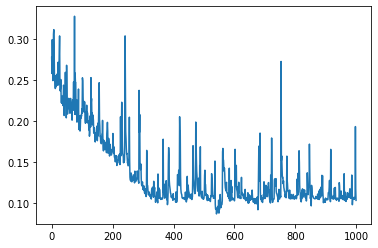

In [ ]:
plt.plot(details.history['val_loss'])
plt.show()

In [ ]:
loss, rmse_error_test = lrcn_model.evaluate(x_test, y_test, batch_size=1)

38/38 [==============================] - 0s 3ms/step - loss: 0.1152 - root_mean_squared_error: 0.3394


In [ ]:
path = '/content/gdrive/MyDrive/Intern bp/models'
lrcn_model_1 = keras.models.load_model(path)

In [ ]:
lrcn_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 6, 30)             120       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 6, 30)             0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 6, 30)            0         
 1D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 6, 30)            120       
 hNormalization)                                                 
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 30)             2730      
                                                                 
 re_lu_5 (ReLU)              (None, 6, 30)            

In [ ]:
lrcn_model_1.evaluate(x_test, y_test, batch_size=1)

38/38 [==============================] - 1s 3ms/step - loss: 0.1152 - root_mean_squared_error: 0.3394


[0.11516119539737701, 0.33935409784317017]

In [ ]:
np.array(x_test)[0].reshape(1, -1).shape

(1, 6)

In [ ]:
prediction = lrcn_model_1.predict(np.array(x_test))[0]
print("prediction", prediction)
print('actual', np.array(y_test)[0])

prediction [0.48655346 0.38175482]
actual [0.93478261 0.72340426]


In [ ]:
np.array(y_test)[2].reshape(1, -1).shape, prediction.reshape(1, -1).shape

((1, 2), (1, 2))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification

NameError: ignored

Inverse the scaling to get actual prediction and true values 

In [ ]:
prediction_unscaled = scaler.inverse_transform(prediction.reshape(1, -1))
actual_unscaled = scaler.inverse_transform(np.array(y_test)[0].reshape(1, -1))
print(prediction_unscaled, actual_unscaled)

[[119.38146   73.942474]] [[140.00000001  89.99999999]]
